Check the coordinate transforms from trajectory segment to segment

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import namedtuple

In [82]:
# Find the endpoint and tangent direction of the arc segment after dt s.
def transform(curvature, speed, dt):
    if abs(curvature) < 1e-300:
        endpoint = np.array([0, speed * dt])
        return endpoint, 0
    theta = speed * curvature * dt
    c, s = math.cos(theta), math.sin(theta)
    r = 1/curvature
    endpoint = r * np.array([-1 + c, s])
    return endpoint, theta

Text(0, 0.5, 'theta')

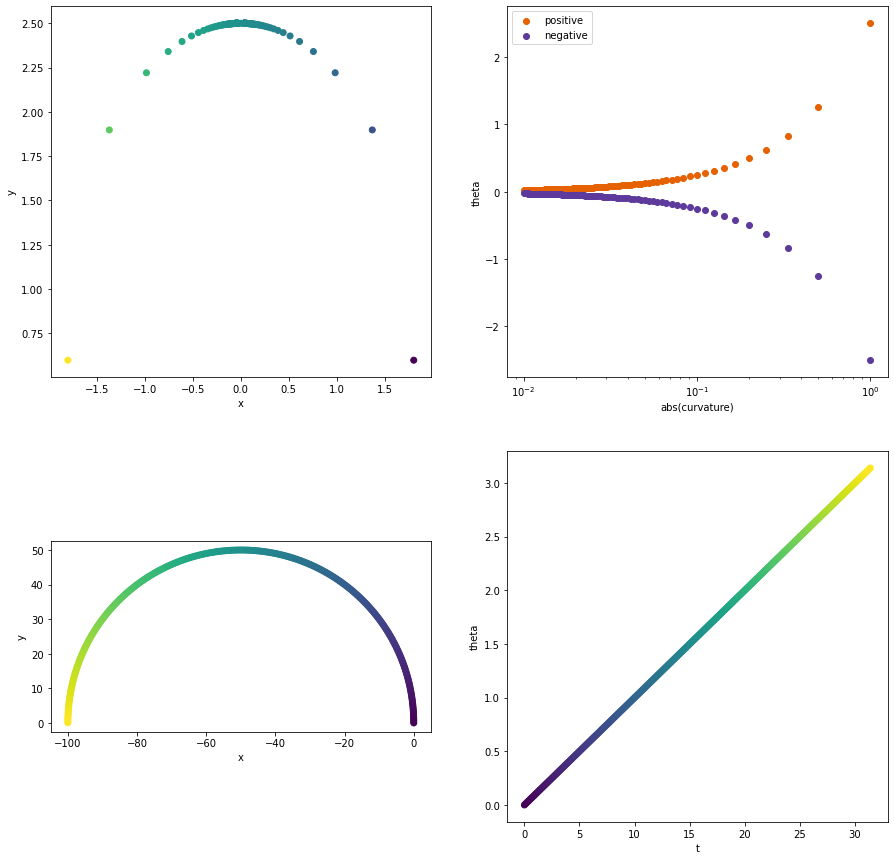

In [88]:
# Find the endpoint and direction for various curvatures
speed = 5
dt = 0.5
curvatures_pos =  1 / np.arange(1, 100, 1)
curvatures = np.concatenate((curvatures_pos, np.array([0]), -curvatures_pos))
transforms = [transform(curvature, speed, dt) for curvature in curvatures]
xs, ys = [transform[0][0] for transform in transforms], [transform[0][1] for transform in transforms]
thetas = [transform[1] for transform in transforms]

fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(15, 15))

ax = axes[0, 0]
ax.scatter(xs, ys, c=curvatures, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax = axes[0, 1]
ax.scatter(np.abs(curvatures[curvatures >= 0]), np.array(thetas)[curvatures >= 0], c="#E66100", label="positive")
ax.scatter(np.abs(curvatures[curvatures < 0]), np.array(thetas)[curvatures < 0], c="#5D3A9B", label="negative")
ax.legend()
ax.set_xlabel("abs(curvature)")
ax.set_ylabel("theta")
ax.set_xscale("log")

# Find the endpoint and direction for a sequence of dt's.
curvature = 1/50.0
speed = 5
dts = np.arange(0, math.pi/speed/curvature, 0.1)
transforms = [transform(curvature, speed, dt) for dt in dts]
xs, ys = [transform[0][0] for transform in transforms], [transform[0][1] for transform in transforms]
thetas = [transform[1] for transform in transforms]

ax = axes[1, 0]
ax.scatter(xs, ys, c=dts)
ax.set_aspect('equal', 'box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax = axes[1, 1]
ax.scatter(dts, thetas, c=dts)
ax.set_xlabel('t')
ax.set_ylabel('theta')

In [95]:
Trajectory = namedtuple('Trajectory', ['curvature', 'speed', 'dt'])
curvature=1/30
speed = 5
dt = math.pi /5 / speed / curvature
trajectories = [Trajectory(curvature = curvature, speed=speed, dt=dt),
                Trajectory(curvature = -curvature, speed=speed, dt=2*dt),
                Trajectory(curvature = curvature, speed=speed, dt=dt),]
                

In [106]:
# Find points along the trajectory
def trjpts(trajectory, tstep):
    dts = np.arange(0, np.abs(t.curvature) * t.speed * dt, tstep) 
    transforms = [transform(t.curvature, t.speed, dt) for dt in dts]
    return [transform[0][0] for transform in transforms], [transform[0][1] for transform in transforms]


In [107]:
tstep = 0.1
for trj in trajectories:
    print(trj.dt, transform(trj.curvature, trj.speed, trj.dt))
    print(trjpts(trj, tstep))

3.769911184307752 (array([-5.72949017, 17.63355757]), 0.6283185307179586)
([0.0, -0.0041665702169424446, -0.01666512351394367, -0.03749218815101152, -0.06664197896632973, -0.10410639898321583, -0.14987504165922538], [0.0, 0.4999768521733518, 0.9998148251026086, 1.4993750781203499, 1.99851884770179, 2.4971074860093077, 2.9950024994048445])
7.539822368615504 (array([20.72949017, 28.53169549]), -1.2566370614359172)
([0.0, -0.0041665702169424446, -0.01666512351394367, -0.03749218815101152, -0.06664197896632973, -0.10410639898321583, -0.14987504165922538], [0.0, 0.4999768521733518, 0.9998148251026086, 1.4993750781203499, 1.99851884770179, 2.4971074860093077, 2.9950024994048445])
3.769911184307752 (array([-5.72949017, 17.63355757]), 0.6283185307179586)
([0.0, -0.0041665702169424446, -0.01666512351394367, -0.03749218815101152, -0.06664197896632973, -0.10410639898321583, -0.14987504165922538], [0.0, 0.4999768521733518, 0.9998148251026086, 1.4993750781203499, 1.99851884770179, 2.497107486009307